In [1]:
!pip install seaborn

In [2]:
!pip install selenium

In [3]:
!pip install webdriver-manager

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.common.by import By

In [5]:
#on_bad_lines skips “bad lines” from the DataFrame. 
#skipinitialspaceboolean skips spaces after delimiter.
book_df = pd.read_csv("./books.csv", sep=",", index_col="bookID",  on_bad_lines="warn", skipinitialspace=True)

b'Skipping line 3350: expected 12 fields, saw 13\nSkipping line 4704: expected 12 fields, saw 13\nSkipping line 5879: expected 12 fields, saw 13\nSkipping line 8981: expected 12 fields, saw 13\n'


It seems we encouter some issues in lines 3550, 4704, 5879 and 8981

In [6]:
book_df.columns

Index(['title', 'authors', 'average_rating', 'isbn', 'isbn13', 'language_code',
       'num_pages', 'ratings_count', 'text_reviews_count', 'publication_date',
       'publisher'],
      dtype='object')

In [25]:
#information regarding the columns
book_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11123 entries, 1 to 45641
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   title               11123 non-null  object 
 1   authors             11123 non-null  object 
 2   average_rating      11123 non-null  float64
 3   isbn                11123 non-null  object 
 4   isbn13              11123 non-null  int64  
 5   language_code       11123 non-null  object 
 6   num_pages           11123 non-null  int64  
 7   ratings_count       11123 non-null  int64  
 8   text_reviews_count  11123 non-null  int64  
 9   publication_date    11123 non-null  object 
 10  publisher           11123 non-null  object 
dtypes: float64(1), int64(4), object(6)
memory usage: 1.0+ MB


In [8]:
#counting NaN values from the dataframe
book_df.isna().sum()#.sum()

title                 0
authors               0
average_rating        0
isbn                  0
isbn13                0
language_code         0
num_pages             0
ratings_count         0
text_reviews_count    0
publication_date      0
publisher             0
dtype: int64

In [9]:
#displaying 5 rows of the dataframe
book_df.head(5)

,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
bookID,,,,,,,,,,,
1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.
2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870,2153167,29221,9/1/2004,Scholastic Inc.
4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780439554893,eng,352,6333,244,11/1/2003,Scholastic
5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,eng,435,2339585,36325,5/1/2004,Scholastic Inc.
8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,0439682584,9780439682589,eng,2690,41428,164,9/13/2004,Scholastic


In [10]:
#checking for any duplicates
book_df.duplicated().any()

False

In [11]:
# calculating the relationship between each column in our dataframe
book_df.corr()

,average_rating,isbn13,num_pages,ratings_count,text_reviews_count
average_rating,1.000000,-0.001965,0.150477,0.038224,0.033663
isbn13,-0.001965,1.000000,-0.009818,0.005494,0.008152
num_pages,0.150477,-0.009818,1.000000,0.034337,0.036977
ratings_count,0.038224,0.005494,0.034337,1.000000,0.865977
text_reviews_count,0.033663,0.008152,0.036977,0.865977,1.000000


We notice a strong correlation between ratings_count and text_reviews_count, so we can infer that more the number of written text reviews the book received more people want to read this book and give a rating.

We can ask ourselves if the book genres/subjects/categories possibly change the ratings.

In [26]:
genre_dict = {}
browser = webdriver.Chrome()
for i in book_df.isbn:
    browser.get("https://www.goodreads.com/genres?ref=nav_brws_genres")
    main_genre = browser.find_element(By.NAME, "q")
    main_genre.send_keys(i)
    main_genre.submit()
    try:
        genre = browser.find_element(By.CSS_SELECTOR,'span.BookPageMetadataSection__genreButton a.Button--tag-inline.Button--small span.Button__labelItem')
        genre_dict[i] = genre.get_attribute("innerHTML")
    except:
        genre_dict[i] = "NaN"
browser.quit()
book_df["Genre"] = genre_dict

KeyboardInterrupt: 

In [20]:
#deleting isbn column, as its not important 
book_df=book_df.drop(columns='isbn')

In [21]:
#deleting isbn13 column, as its not important 
book_df=book_df.drop(columns='isbn13')

In [21]:
book_df.describe()

,average_rating,isbn13,num_pages,ratings_count,text_reviews_count
count,11123.000000,1.112300e+04,11123.000000,1.112300e+04,11123.000000
mean,3.934075,9.759880e+12,336.405556,1.794285e+04,542.048099
std,0.350485,4.429758e+11,241.152626,1.124992e+05,2576.619589
min,0.000000,8.987060e+09,0.000000,0.000000e+00,0.000000
25%,3.770000,9.780345e+12,192.000000,1.040000e+02,9.000000
50%,3.960000,9.780582e+12,299.000000,7.450000e+02,47.000000
75%,4.140000,9.780872e+12,416.000000,5.000500e+03,238.000000
max,5.000000,9.790008e+12,6576.000000,4.597666e+06,94265.000000


In [22]:
# counting the number of books published under each publisher
book_df.publisher.value_counts()

Vintage                        318
Penguin Books                  261
Penguin Classics               184
Mariner Books                  150
Ballantine Books               144
                              ... 
University of Calgary Press      1
Marlowe & Company                1
University Press of America      1
Abstract Studio                  1
VeloPress                        1
Name: publisher, Length: 2290, dtype: int64

In [23]:
# counting the number of books written by each author
book_df.authors.value_counts()

Stephen King                                              40
P.G. Wodehouse                                            40
Rumiko Takahashi                                          39
Orson Scott Card                                          35
Agatha Christie                                           33
                                                          ..
Legs McNeil/Gillian McCain                                 1
Adam Woog                                                  1
Mikal Gilmore                                              1
Thich Nhat Hanh/Arnold Kotler/Dalai Lama XIV               1
William T. Vollmann/Larry McCaffery/Michael Hemmingson     1
Name: authors, Length: 6639, dtype: int64

In [24]:
# counting the number of books written by each language
book_df.language_code.value_counts()

eng      8908
en-US    1408
spa       218
en-GB     214
fre       144
ger        99
jpn        46
mul        19
zho        14
grc        11
por        10
en-CA       7
ita         5
enm         3
lat         3
swe         2
rus         2
srp         1
nl          1
msa         1
glg         1
wel         1
ara         1
nor         1
tur         1
gla         1
ale         1
Name: language_code, dtype: int64

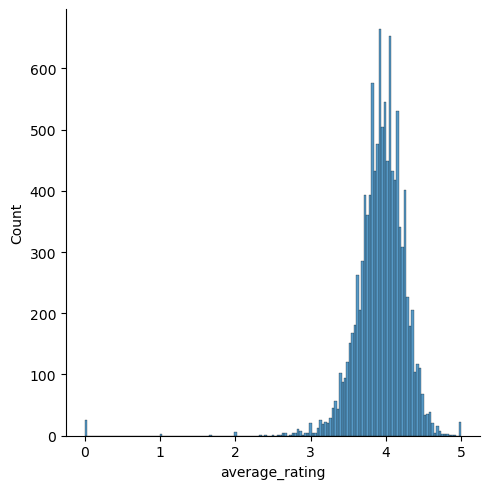

In [26]:
#plotting count of the average_rating
sns.displot(book_df.average_rating)

<AxesSubplot: ylabel='language_code'>

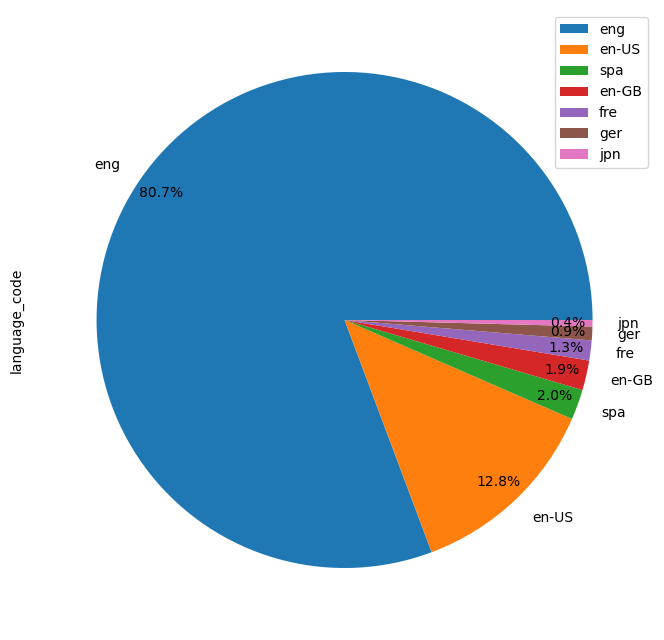

In [27]:
#plotting the percentage of different languages of books 
book_df.language_code.value_counts().head(7).plot(kind='pie', figsize=(8,30), legend=True,autopct='%1.1f%%', pctdistance=0.9,radius=1)